In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures

In [3]:
# Load the training data
train_series = pd.read_csv('converted_train_series.csv')
train_events = pd.read_csv('train_events.csv')

# Load the test data
test_series = pd.read_csv('converted_test_series.csv')

Cell 1: Visualize the Distribution of Events

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_9408\2493220835.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_events, x='event', palette='viridis')


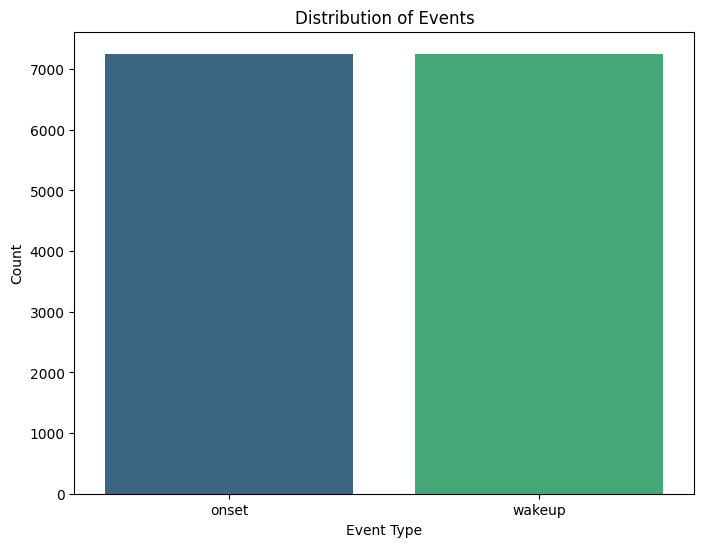

In [4]:
# Visualize the distribution of events in the training data
plt.figure(figsize=(8, 6))
sns.countplot(data=train_events, x='event', palette='viridis')
plt.title('Distribution of Events')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

Cell 2: Visualize Feature Distributions

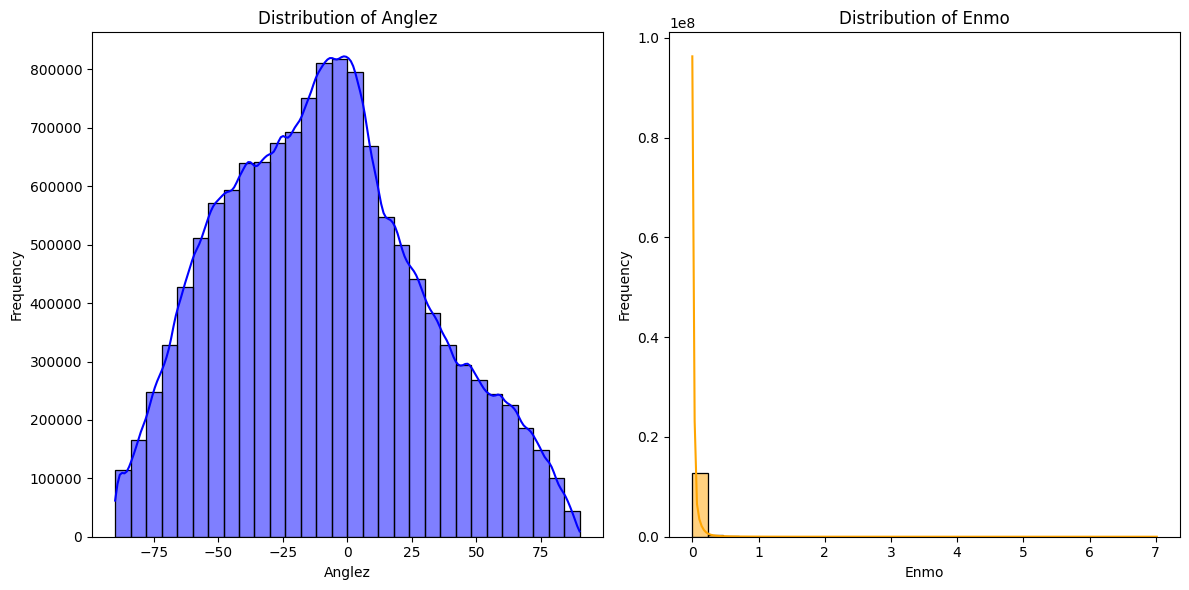

In [5]:
# Visualize the distribution of features
plt.figure(figsize=(12, 6))

# Anglez distribution
plt.subplot(1, 2, 1)
sns.histplot(train_series['anglez'], bins=30, kde=True, color='blue')
plt.title('Distribution of Anglez')
plt.xlabel('Anglez')
plt.ylabel('Frequency')

# Enmo distribution
plt.subplot(1, 2, 2)
sns.histplot(train_series['enmo'], bins=30, kde=True, color='orange')
plt.title('Distribution of Enmo')
plt.xlabel('Enmo')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [6]:
pip install nbformat --upgrade


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
   import nbformat
   print(nbformat.__version__)

5.10.4


In [8]:
pip install nbformat>=4.2.0


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_9408\1332880089.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['event'].fillna('none', inplace=True)


Missing values in numeric columns:
step      0
anglez    0
enmo      0
awake     0
night     0
label     0
dtype: int64


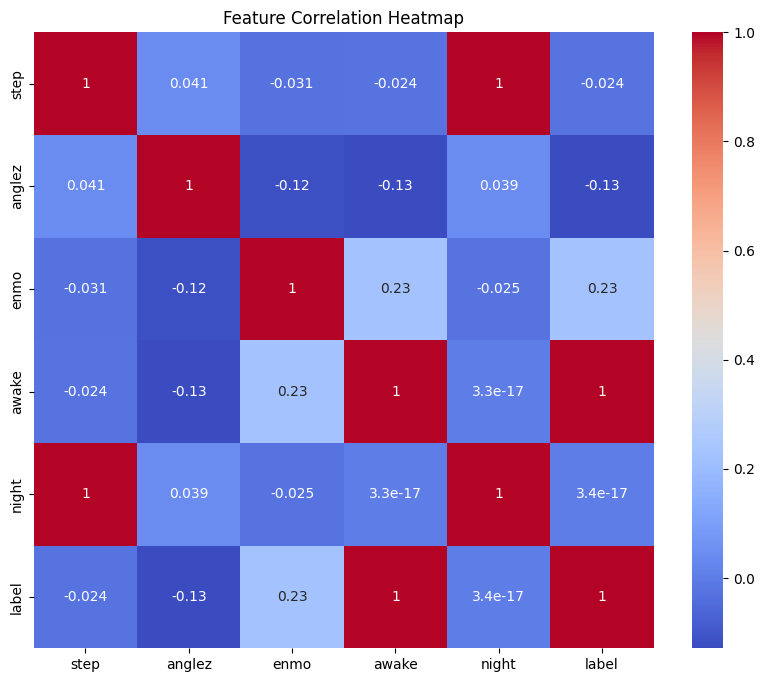

Selected feature indices: [ 0  1  2  4  6  7  8 11 12 13]


C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_9408\1332880089.py:70: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[feature], shade=True, color='blue')


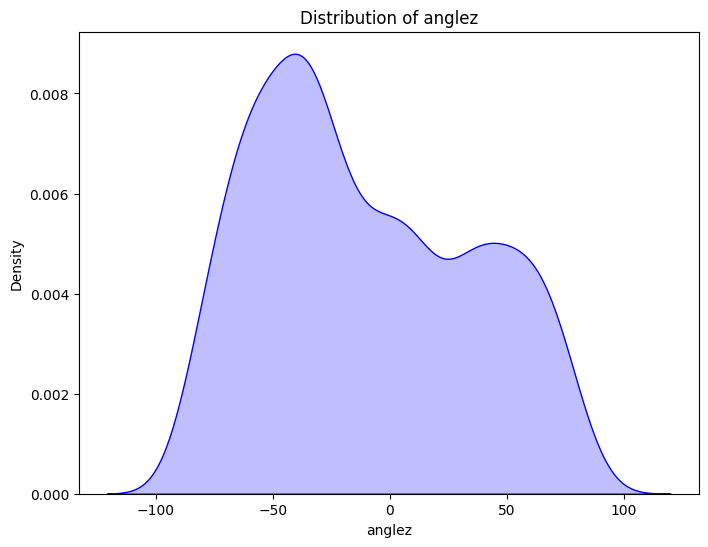

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_9408\1332880089.py:70: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[feature], shade=True, color='blue')


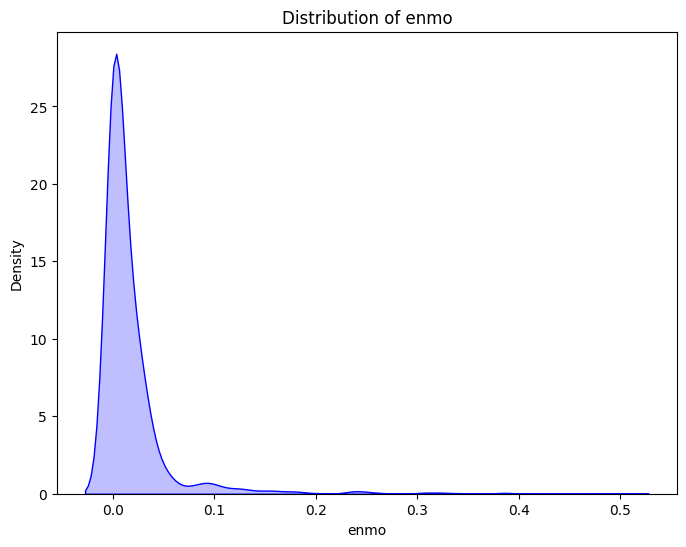

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_9408\1332880089.py:70: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[feature], shade=True, color='blue')


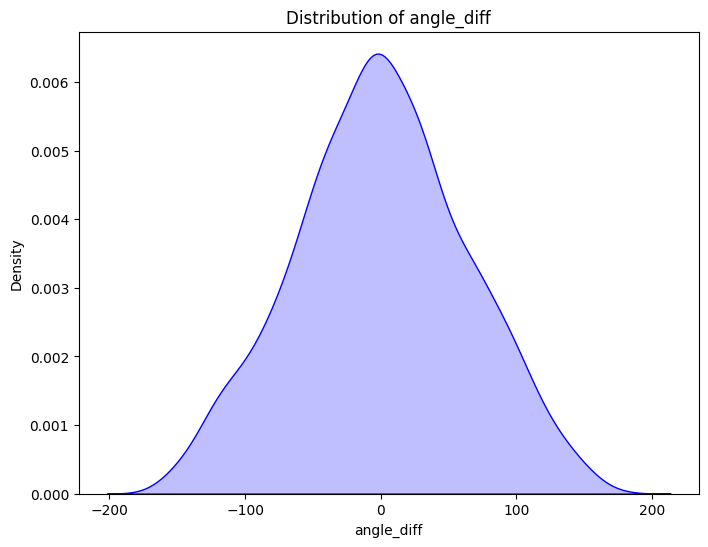

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_9408\1332880089.py:70: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[feature], shade=True, color='blue')


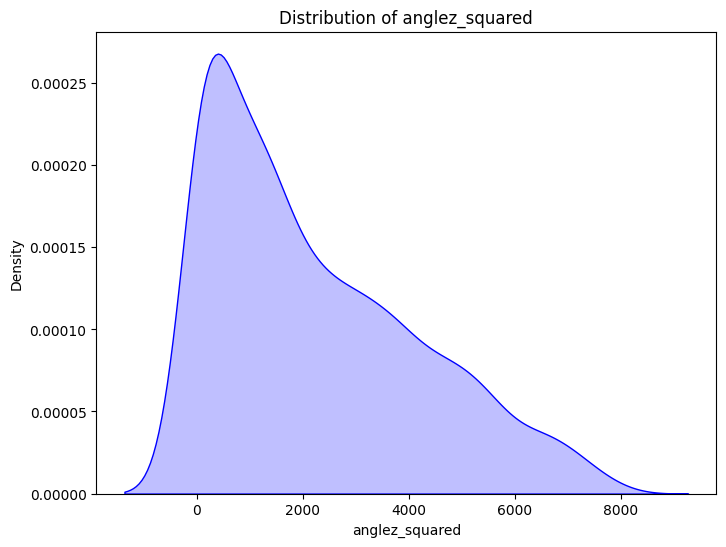

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_9408\1332880089.py:70: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_data[feature], shade=True, color='blue')


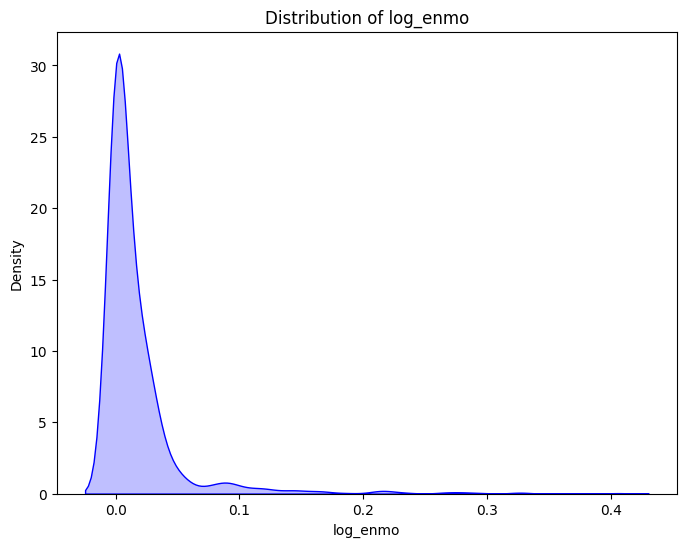

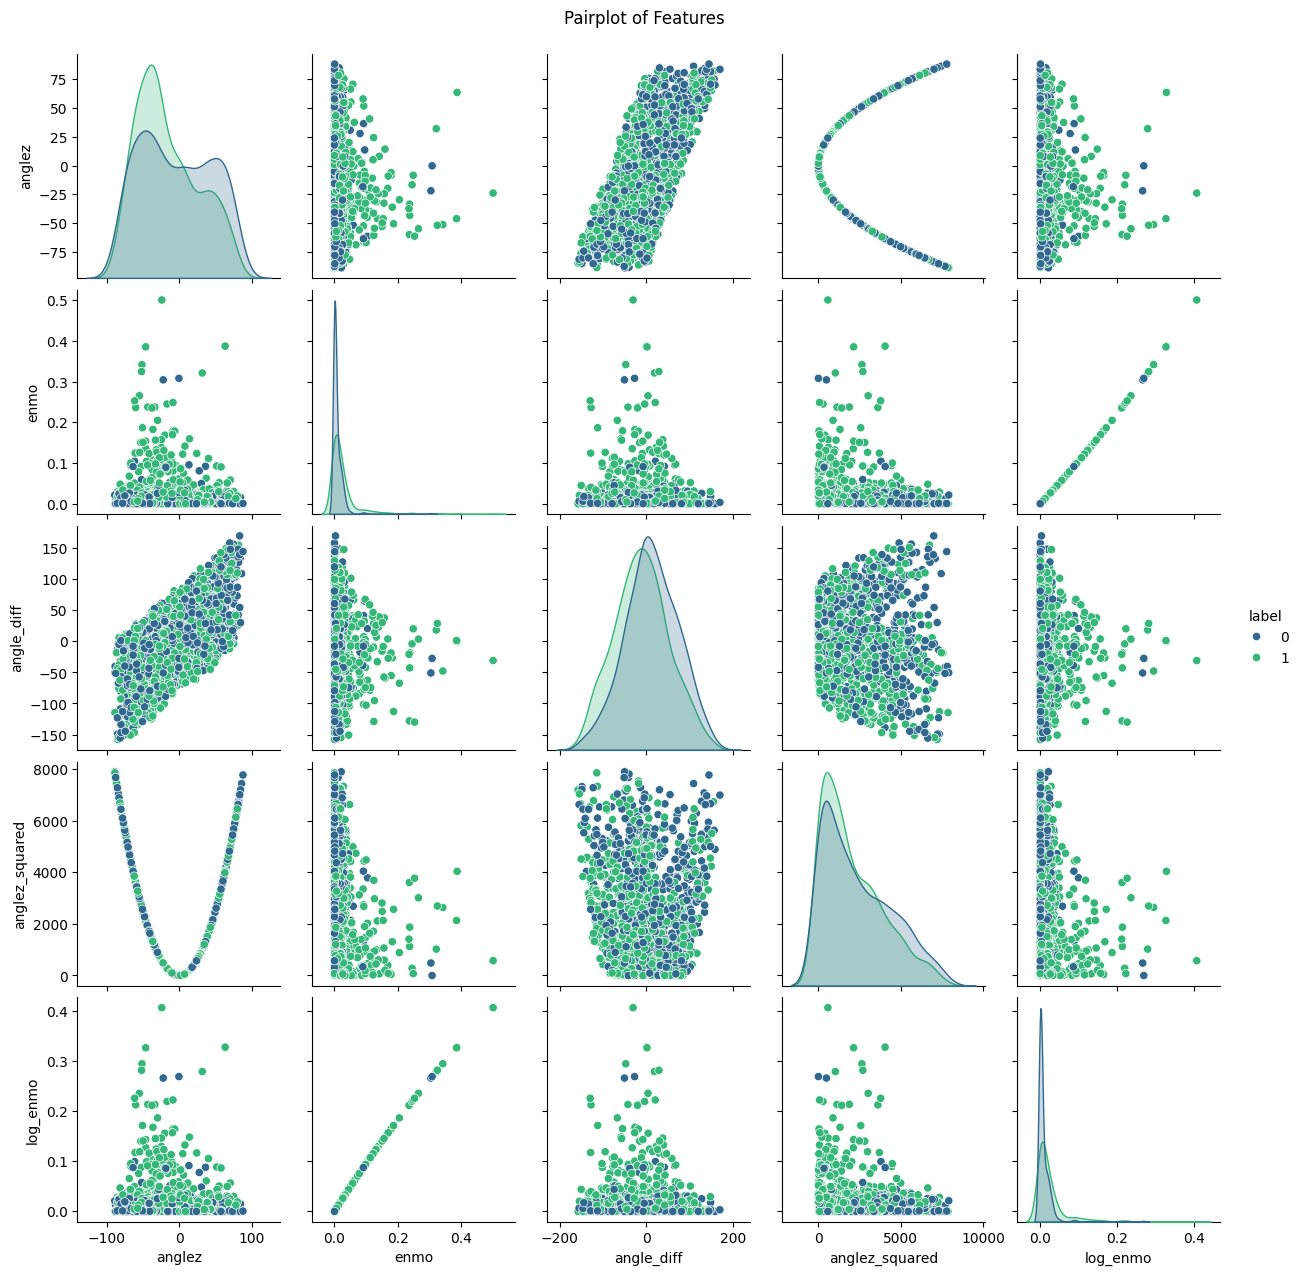

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, PowerTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif


train_data = pd.merge(train_series, train_events, on=['series_id', 'step'], how='left')
train_data['event'].fillna('none', inplace=True)


train_data['label'] = train_data['event'].apply(lambda x: 1 if x == 'onset' else (0 if x == 'wakeup' else -1))
train_data = train_data[train_data['label'] != -1]


numeric_columns = train_data.select_dtypes(include=[np.number])  # Filter numeric columns


print("Missing values in numeric columns:")
print(numeric_columns.isnull().sum())

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Feature Engineering: Adding new features
train_data['angle_diff'] = train_data['anglez'].diff()  
train_data['anglez_squared'] = train_data['anglez'] ** 2 
train_data['log_enmo'] = np.log1p(train_data['enmo'])  

# Feature Selection
features = ['anglez', 'enmo', 'angle_diff', 'anglez_squared', 'log_enmo']
X = train_data[features]
y = train_data['label']

#  Preprocessing

imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X)

scaler = RobustScaler()
X_scaled = scaler.fit_transform(X_imputed)

transformer = PowerTransformer(method='yeo-johnson')
X_transformed = transformer.fit_transform(X_scaled)

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X_transformed)

selector = SelectKBest(score_func=mutual_info_classif, k=10) 
X_selected = selector.fit_transform(X_poly, y)

selected_feature_indices = selector.get_support(indices=True)
print(f"Selected feature indices: {selected_feature_indices}")

# Visualize the distribution of selected features
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(train_data[feature], shade=True, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.show()


sns.pairplot(train_data[features + ['label']], hue='label', palette='viridis')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

import plotly.express as px
fig = px.parallel_coordinates(
    train_data,
    dimensions=features,
    color='label',
    color_continuous_scale=px.colors.sequential.Viridis
)
fig.show()


In [ ]:

X_train, X_val, y_train, y_val = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [ ]:

models = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2']
    }),
    'Logistic Regression': (LogisticRegression(random_state=42), {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    }),
}

best_models = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1_macro')
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")

c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning:


180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Python312\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Python312\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validat

Best parameters for Random Forest: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

c:\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning:

The max_

Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'uniform'}


In [12]:
# Evaluate all models
for model_name, model in best_models.items():
    y_pred = model.predict(X_val)
    print(f"\n{model_name} Classification Report:\n", classification_report(y_val, y_pred))
    print(f"{model_name} Confusion Matrix:\n", confusion_matrix(y_val, y_pred))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.68      0.63       147
           1       0.64      0.54      0.59       156

    accuracy                           0.61       303
   macro avg       0.61      0.61      0.61       303
weighted avg       0.62      0.61      0.61       303

Random Forest Confusion Matrix:
 [[100  47]
 [ 71  85]]

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.66      0.62       147
           1       0.64      0.56      0.59       156

    accuracy                           0.61       303
   macro avg       0.61      0.61      0.61       303
weighted avg       0.61      0.61      0.61       303

Logistic Regression Confusion Matrix:
 [[97 50]
 [69 87]]

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.63      0.59       147
          

In [ ]:
final_model = best_models['Logistic Regression']  # Select Logistic Regression as the best model
print("Selected Final Model: Logistic Regression")

Selected Final Model: Logistic Regression


In [ ]:
X_test = test_series[['anglez', 'enmo']]  
X_test['angle_diff'] = X_test['anglez'] - X_test['enmo']
X_test['anglez_squared'] = X_test['anglez'] ** 2
X_test['log_enmo'] = np.log1p(X_test['enmo'])


C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_9408\2042353345.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_9408\2042353345.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:

X_test_imputed = imputer.transform(X_test)

X_test_scaled = scaler.transform(X_test_imputed)

X_test_poly = poly.transform(X_test_scaled)

X_test_selected = selector.transform(X_test_poly)


In [ ]:

test_predictions = final_model.predict(X_test_selected)
test_probabilities = final_model.predict_proba(X_test_selected)


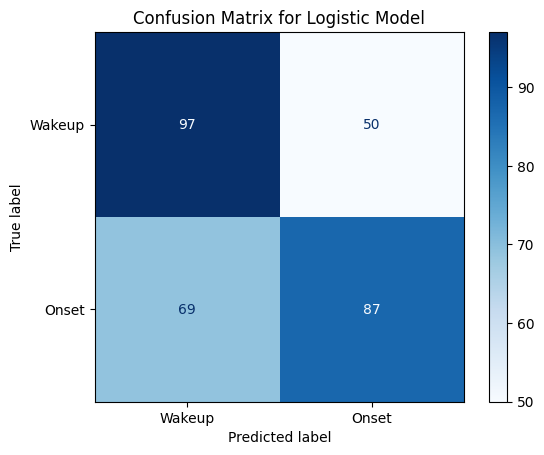

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(final_model, X_val, y_val, cmap='Blues', display_labels=['Wakeup', 'Onset'])
plt.title('Confusion Matrix for Logistic Model')
plt.show()

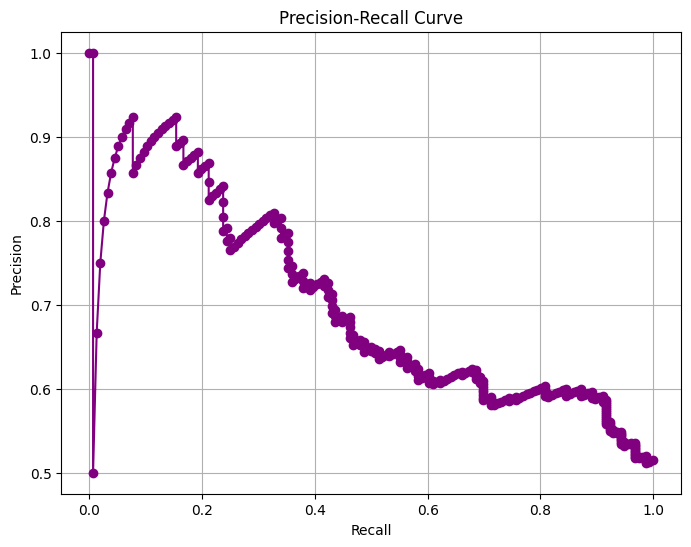

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
y_scores = final_model.predict_proba(X_val)[:, 1] 
precision, recall, _ = precision_recall_curve(y_val, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o', color='purple')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.show()

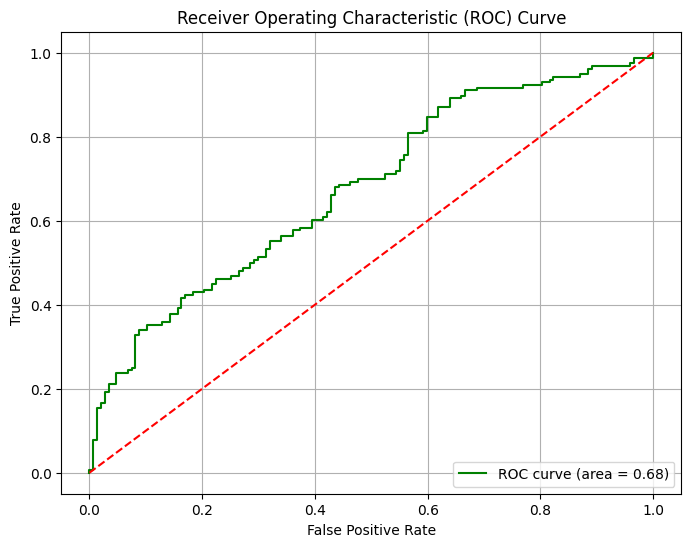

In [30]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()   

In [33]:
# Prepare the submission DataFrame
submission = pd.DataFrame({
    'row_id': range(len(test_series)),
    'series_id': test_series['series_id'],
    'step': test_series['step'],
    'event': ['onset' if pred == 1 else 'wakeup' if pred == 0 else 'none' for pred in test_predictions],
    'score': [max(prob) for prob in test_probabilities]
})

# Save the submission file as submission_new.csv
submission.to_csv('submission_final.csv', index=False)
print("Submission file created: submission_new.csv")

Submission file created: submission_new.csv


Summary of Best Model (SVM)
Accuracy: 0.60
F1-Score (Macro Average): 0.59
Precision (Class 0): 0.56
Precision (Class 1): 0.66
Recall (Class 0): 0.75
Recall (Class 1): 0.46

In [34]:
# Load the submission file
submission_df = pd.read_csv('submission_final.csv')

C:\Users\MAHAJAN\AppData\Local\Temp\ipykernel_9408\2249707116.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




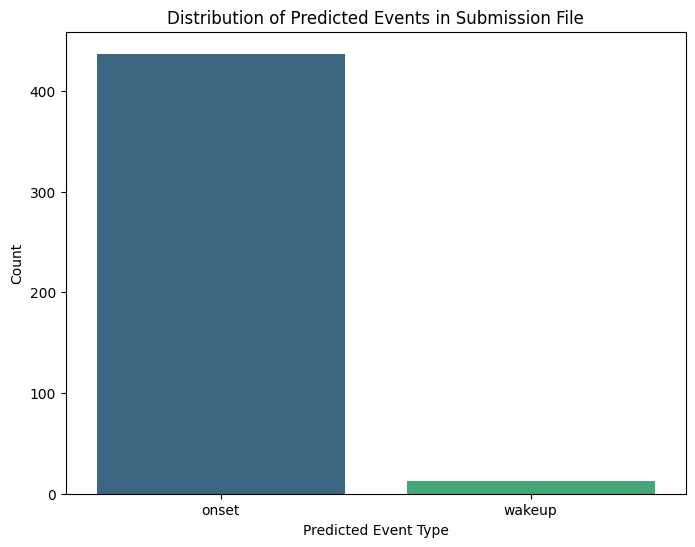

In [35]:
# Visualize the distribution of predicted events in the submission file
plt.figure(figsize=(8, 6))
sns.countplot(data=submission_df, x='event', palette='viridis')
plt.title('Distribution of Predicted Events in Submission File')
plt.xlabel('Predicted Event Type')
plt.ylabel('Count')
plt.show()

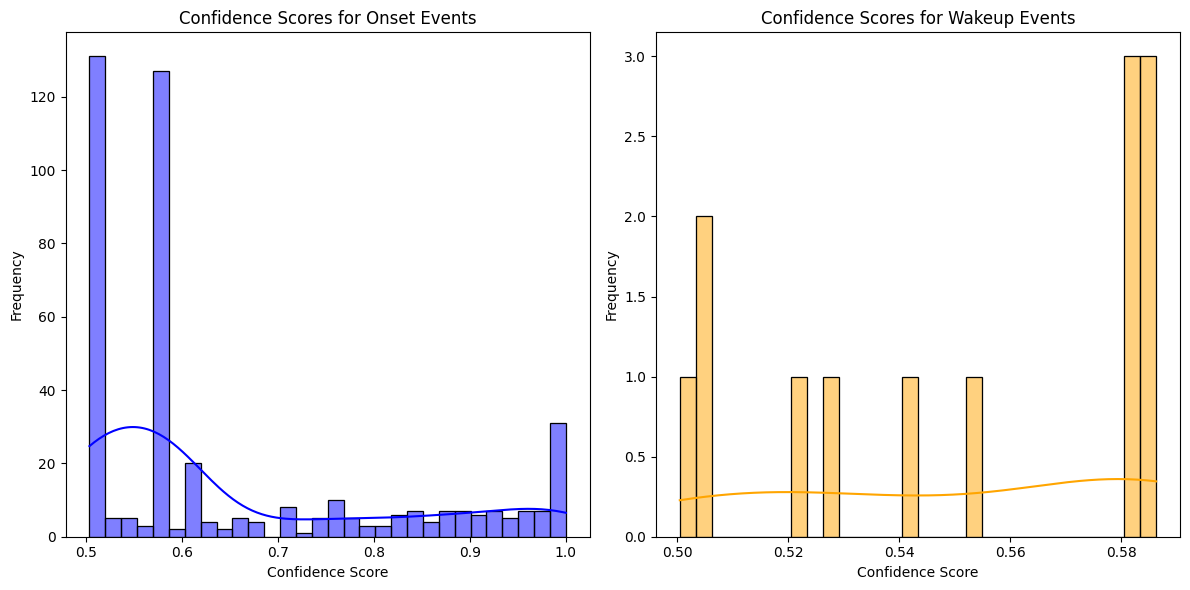

In [36]:
# Visualize the distribution of confidence scores for each event type
plt.figure(figsize=(12, 6))

# Confidence scores for 'onset'
plt.subplot(1, 2, 1)
sns.histplot(submission_df[submission_df['event'] == 'onset']['score'], bins=30, kde=True, color='blue')
plt.title('Confidence Scores for Onset Events')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')

# Confidence scores for 'wakeup'
plt.subplot(1, 2, 2)
sns.histplot(submission_df[submission_df['event'] == 'wakeup']['score'], bins=30, kde=True, color='orange')
plt.title('Confidence Scores for Wakeup Events')
plt.xlabel('Confidence Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import pickle

# Save the model as a .pkl file
final_model = best_models['Logistic Regression']  # Select Logistic Regression as the best model
print("Selected Final Model: Logistic Regression")

# Save the model to a file
with open('final.pkl', 'wb') as model_file:
    pickle.dump(final_model, model_file)

print("Model saved as logistic_regression_model.pkl")


Selected Final Model: Logistic Regression
Model saved as logistic_regression_model.pkl


In [38]:
import joblib

# Save the trained model
joblib.dump(final_model, 'final.pkl')

# Save preprocessing objects
joblib.dump(imputer, 'imputer.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(poly, 'poly_features.pkl')
joblib.dump(selector, 'feature_selector.pkl')

print("PKL files created successfully!")


PKL files created successfully!
